In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

from sklearn.model_selection import train_test_split

from sklearn.metrics import f1_score,accuracy_score,classification_report
from sklearn.pipeline import Pipeline

from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer

In [2]:
df = pd.read_csv('Datasets\Titanic-Dataset.csv')
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\T'
<>:1: SyntaxWarning: invalid escape sequence '\T'
C:\Users\DELL\AppData\Local\Temp\ipykernel_22020\1397461396.py:1: SyntaxWarning: invalid escape sequence '\T'
  df = pd.read_csv('Datasets\Titanic-Dataset.csv')


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.drop('Name',axis=1,inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [5]:
df.drop(['PassengerId','Cabin','Ticket'],axis=1,inplace=True)

In [6]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [7]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [8]:
df['Embarked'].fillna('S',inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_22020\3895404187.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna('S',inplace=True)


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [10]:
p_class = pd.DataFrame(pd.crosstab(df['Pclass'],df['Survived'],margins=True))
p_class['Survival Rate'] = p_class[1] / p_class['All']
p_class

Survived,0,1,All,Survival Rate
Pclass,,,,
1,80,136,216,0.629630
2,97,87,184,0.472826
3,372,119,491,0.242363
All,549,342,891,0.383838


<Axes: xlabel='Pclass'>

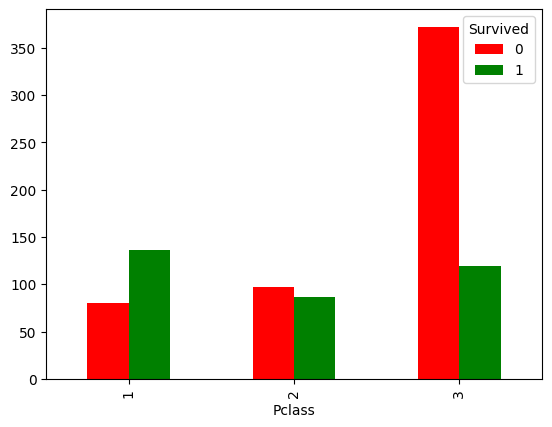

In [11]:
pd.crosstab(df['Pclass'],df['Survived']).plot(kind= 'bar',color = ['red','green'])

1st class = 0.62 survival

2nd class = 0.47 survival

3rd class = 0.24 survival

In [12]:
df['Male'] = df['Sex'].apply(lambda x: 1 if x == 'male' else 0)

In [13]:
df['Sex'] = df['Male']
df.drop('Male',axis=1,inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


Survived         0         1
Sex                         
0         0.257962  0.742038
1         0.811092  0.188908


<Axes: xlabel='Sex'>

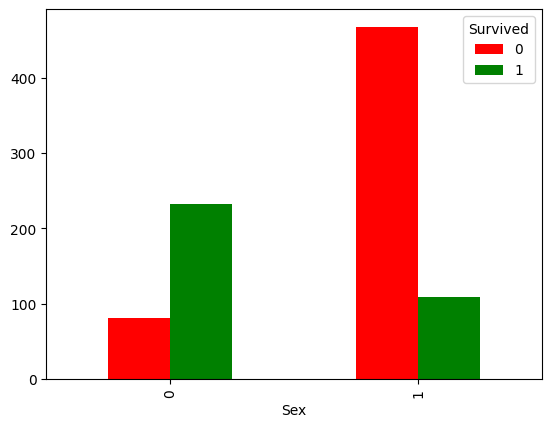

In [14]:
print(pd.crosstab(df['Sex'],df['Survived'],normalize='index'))
pd.crosstab(df['Sex'],df['Survived']).plot(kind= 'bar',color = ['red','green'])

Male = 0.188

Female = 0.74

Survived      0    1  All   Suvival
Pclass Sex                         
1      0      3   91   94  0.968085
       1     77   45  122  0.368852
2      0      6   70   76  0.921053
       1     91   17  108  0.157407
3      0     72   72  144  0.500000
       1    300   47  347  0.135447
All         549  342  891  0.383838


<Axes: xlabel='Pclass,Sex'>

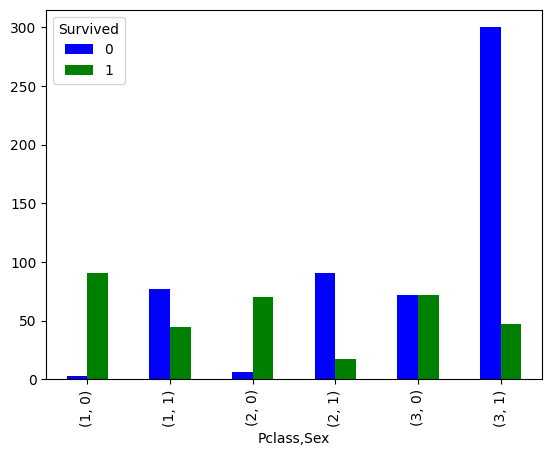

In [15]:
p_classAndSex = pd.crosstab([df['Pclass'],df['Sex']],df['Survived'],margins=True)
p_classAndSex['Suvival'] = p_classAndSex[1] / p_classAndSex['All']
print(p_classAndSex)
pd.crosstab([df['Pclass'],df['Sex']],df['Survived']).plot(kind = 'bar',color = ['blue','green'])

#### See the above survival rate 

In [16]:
df['AgeFilled'] = df['Age'].fillna(df['Age'].mean())

In [17]:
df['AgeFilled'].astype('int64')

0      22
1      38
2      26
3      35
4      35
       ..
886    27
887    19
888    29
889    26
890    32
Name: AgeFilled, Length: 891, dtype: int64

In [18]:
df['Age'] = df['AgeFilled']
df.drop('AgeFilled',inplace=True,axis=1)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(5), object(1)
memory usage: 55.8+ KB


In [20]:
import scipy.stats as stats


C:\Users\DELL\AppData\Local\Temp\ipykernel_22020\1156415056.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


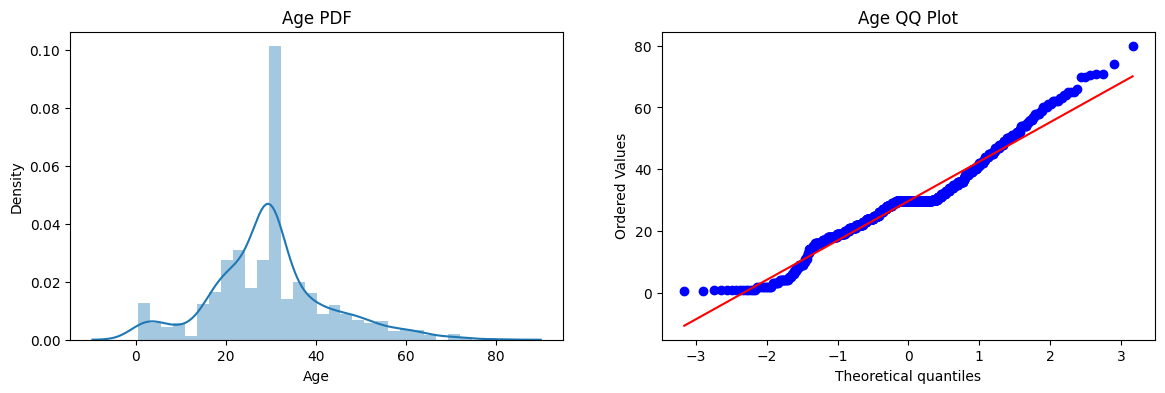

In [21]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(df['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(df['Age'], dist="norm", plot=plt)
plt.title('Age QQ Plot')

plt.show()

In [22]:
def inverse(x):
    return np.log(x)

In [23]:
from sklearn.preprocessing import FunctionTransformer

Ft = FunctionTransformer(func = inverse)

C:\Users\DELL\AppData\Local\Temp\ipykernel_22020\3817937853.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age_transformed'])


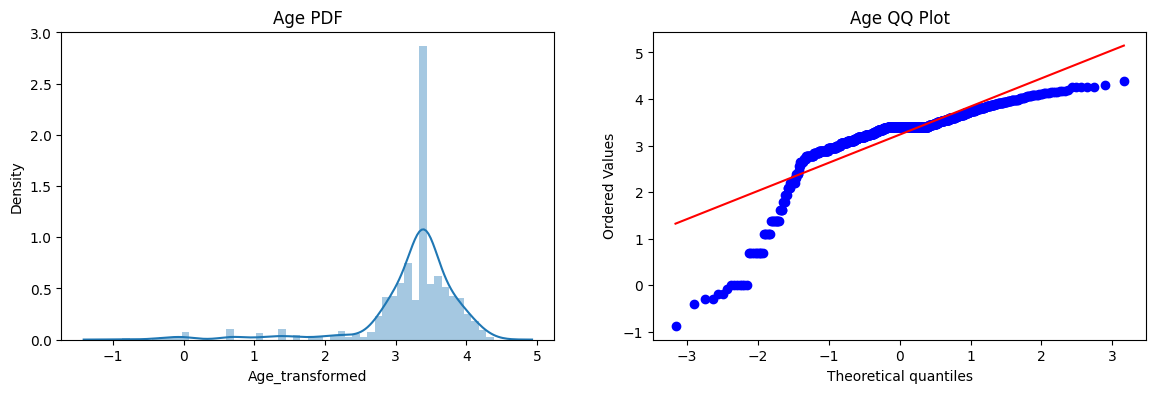

In [24]:
df['Age_transformed'] = Ft.fit_transform(df['Age'])

plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(df['Age_transformed'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(df['Age_transformed'], dist="norm", plot=plt)
plt.title('Age QQ Plot')

plt.show()

In [25]:
df.drop('Age_transformed',inplace=True,axis = 1)

In [26]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [27]:
bins = [0, 10, 20, 30, 40, 50, 60, 80]

df['AgeGroup'] = pd.cut(df['Age'], bins)

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup
0,0,3,1,22.0,1,0,7.2500,S,"(20, 30]"
1,1,1,0,38.0,1,0,71.2833,C,"(30, 40]"
2,1,3,0,26.0,0,0,7.9250,S,"(20, 30]"
3,1,1,0,35.0,1,0,53.1000,S,"(30, 40]"
4,0,3,1,35.0,0,0,8.0500,S,"(30, 40]"


In [28]:
df['AgeGroup'].value_counts()

AgeGroup
(20, 30]    407
(30, 40]    155
(10, 20]    115
(40, 50]     86
(0, 10]      64
(50, 60]     42
(60, 80]     22
Name: count, dtype: int64

In [29]:
Agegroup = pd.crosstab(df['AgeGroup'],df['Survived'],margins=True)
Agegroup['Survival Rate'] = Agegroup[1] / Agegroup['All']
Agegroup

Survived,0,1,All,Survival Rate
AgeGroup,,,,
"(0, 10]",26,38,64,0.593750
"(10, 20]",71,44,115,0.382609
"(20, 30]",271,136,407,0.334152
"(30, 40]",86,69,155,0.445161
"(40, 50]",53,33,86,0.383721
"(50, 60]",25,17,42,0.404762
"(60, 80]",17,5,22,0.227273
All,549,342,891,0.383838


C:\Users\DELL\AppData\Local\Temp\ipykernel_22020\2334219492.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


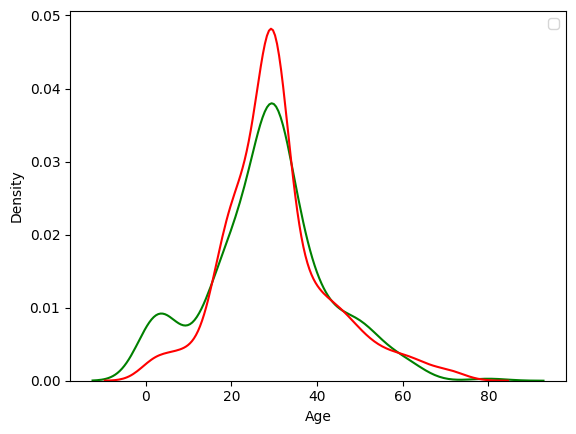

In [30]:
sns.kdeplot(df[df['Survived'] == 1]['Age'],color = 'green')
sns.kdeplot(df[df['Survived'] == 0]['Age'],color='red')
plt.legend()

See the above probabilities of surviving

In [31]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup
0,0,3,1,22.0,1,0,7.2500,S,"(20, 30]"
1,1,1,0,38.0,1,0,71.2833,C,"(30, 40]"
2,1,3,0,26.0,0,0,7.9250,S,"(20, 30]"
3,1,1,0,35.0,1,0,53.1000,S,"(30, 40]"
4,0,3,1,35.0,0,0,8.0500,S,"(30, 40]"


In [32]:
print(df['SibSp'].value_counts())
print(df['Parch'].value_counts())

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64
Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64


In [33]:
df['Family'] = df['Parch'] + df['SibSp']

In [34]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,Family
0,0,3,1,22.0,1,0,7.2500,S,"(20, 30]",1
1,1,1,0,38.0,1,0,71.2833,C,"(30, 40]",1
2,1,3,0,26.0,0,0,7.9250,S,"(20, 30]",0
3,1,1,0,35.0,1,0,53.1000,S,"(30, 40]",1
4,0,3,1,35.0,0,0,8.0500,S,"(30, 40]",0


In [35]:
df.Family.value_counts()

Family
0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: count, dtype: int64

In [36]:
pd.crosstab(df['Family'],df['Survived'])

Survived,0,1
Family,,
0,374,163
1,72,89
2,43,59
3,8,21
4,12,3
5,19,3
6,8,4
7,6,0
10,7,0


In [37]:
def FamilyClassifier(x):
    if x == 0:
        return 'Alone'
    elif x in [1,2,3]:
        return 'Small Family'
    elif x in [4,5,6]:
        return 'Mid Family'
    else:
        return 'Large Family'

In [38]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,Family
0,0,3,1,22.0,1,0,7.2500,S,"(20, 30]",1
1,1,1,0,38.0,1,0,71.2833,C,"(30, 40]",1
2,1,3,0,26.0,0,0,7.9250,S,"(20, 30]",0
3,1,1,0,35.0,1,0,53.1000,S,"(30, 40]",1
4,0,3,1,35.0,0,0,8.0500,S,"(30, 40]",0


<Axes: xlabel='Fare', ylabel='Density'>

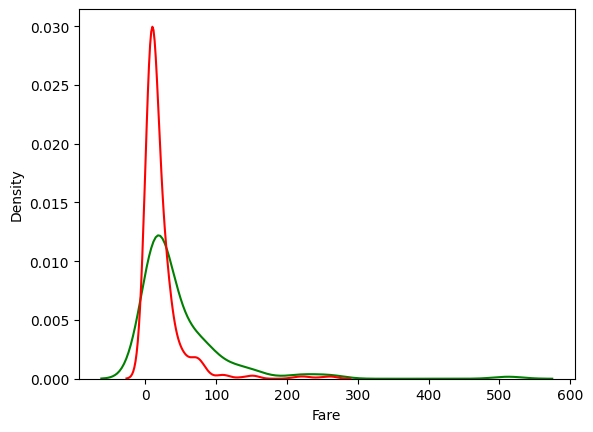

In [39]:
sns.kdeplot(df[df['Survived'] == 1]['Fare'],color = 'green')
sns.kdeplot(df[df['Survived'] == 0]['Fare'],color='red')

In [40]:
pd.crosstab(df['Embarked'],df['Survived'])

Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,219


Survived        0    1  All
Embarked Sex               
C        0      9   64   73
         1     66   29   95
Q        0      9   27   36
         1     38    3   41
S        0     63  142  205
         1    364   77  441
All           549  342  891


<Axes: xlabel='Embarked,Sex'>

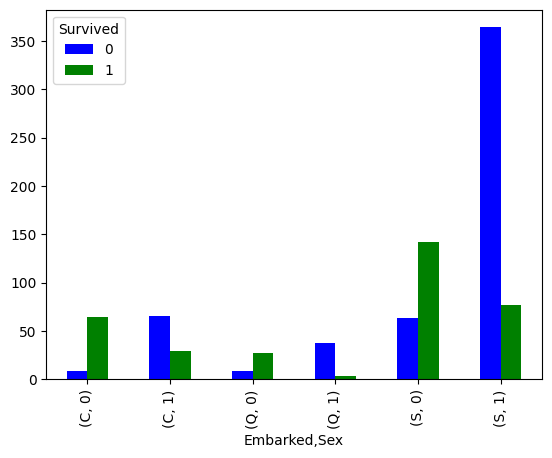

In [41]:
print(pd.crosstab([df['Embarked'],df['Sex']],df['Survived'],margins=True))
pd.crosstab([df['Embarked'],df['Sex']],df['Survived']).plot(kind = 'bar',color = ['blue','green'])

Embarked doesn't make any differnce see the above table It just about Sex 

In [42]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,Family
0,0,3,1,22.0,1,0,7.2500,S,"(20, 30]",1
1,1,1,0,38.0,1,0,71.2833,C,"(30, 40]",1
2,1,3,0,26.0,0,0,7.9250,S,"(20, 30]",0
3,1,1,0,35.0,1,0,53.1000,S,"(30, 40]",1
4,0,3,1,35.0,0,0,8.0500,S,"(30, 40]",0


In [43]:
df['Family'] = df['Family'].apply(FamilyClassifier)

In [44]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,Family
0,0,3,1,22.0,1,0,7.2500,S,"(20, 30]",Small Family
1,1,1,0,38.0,1,0,71.2833,C,"(30, 40]",Small Family
2,1,3,0,26.0,0,0,7.9250,S,"(20, 30]",Alone
3,1,1,0,35.0,1,0,53.1000,S,"(30, 40]",Small Family
4,0,3,1,35.0,0,0,8.0500,S,"(30, 40]",Alone


In [45]:
X = df.iloc[:,[1,2,3,6,9]]
y = df.iloc[:,0]

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
X_train.shape

(712, 5)

In [48]:
X_train

,Pclass,Sex,Age,Fare,Family
331,1,1,45.500000,28.5000,Alone
733,2,1,23.000000,13.0000,Alone
382,3,1,32.000000,7.9250,Alone
704,3,1,26.000000,7.8542,Small Family
813,3,0,6.000000,31.2750,Mid Family
...,...,...,...,...,...
106,3,0,21.000000,7.6500,Alone
270,1,1,29.699118,31.0000,Alone
860,3,1,41.000000,14.1083,Small Family
435,1,0,14.000000,120.0000,Small Family


In [49]:
X_train['Family'].unique()

array(['Alone', 'Small Family', 'Mid Family', 'Large Family'],
      dtype=object)

In [50]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [51]:
oe = OrdinalEncoder(categories=[['Alone', 'Small Family', 'Mid Family', 'Large Family']])

In [52]:
oe.fit(X_train[['Family']])
X_t = oe.transform(X_train[['Family']])
X_t

array([[0.],
       [0.],
       [0.],
       [1.],
       [2.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [2.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [2.],
       [2.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [2.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],

In [53]:
oe.categories_

[array(['Alone', 'Small Family', 'Mid Family', 'Large Family'],
       dtype=object)]

In [54]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OrdinalEncoder(categories=[['Alone', 'Small Family', 'Mid Family', 'Large Family']]), ['Family']),
        ('num',StandardScaler(),[2,3])
    ],
    remainder='passthrough'
)

In [55]:
X_train_transform = preprocessor.fit_transform(X_train)

In [56]:
X_test_transform = preprocessor.transform(X_test)

In [57]:
lb = LabelEncoder()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

In [59]:
def ModelTrainPredict(clf):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print(classification_report(y_test,y_pred))

In [60]:
X_train = X_train_transform
X_test = X_test_transform

In [61]:
lr = LogisticRegression(penalty='l2',solver='sag')
ModelTrainPredict(lr)

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       105
           1       0.79      0.73      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [62]:
dt = DecisionTreeClassifier(max_depth=4)
ModelTrainPredict(dt)

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       105
           1       0.80      0.69      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



In [63]:
rf = RandomForestClassifier(random_state=42)
ModelTrainPredict(rf)


              precision    recall  f1-score   support

           0       0.81      0.86      0.83       105
           1       0.78      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [64]:
gdc = GradientBoostingClassifier()
ModelTrainPredict(gdc)

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.70      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [65]:
knn = KNeighborsClassifier(n_neighbors=4)
ModelTrainPredict(knn) 

              precision    recall  f1-score   support

           0       0.81      0.91      0.86       105
           1       0.85      0.70      0.77        74

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.82       179



In [66]:
svc = SVC(kernel='poly',degree=3)
ModelTrainPredict(svc)

              precision    recall  f1-score   support

           0       0.88      0.83      0.85       105
           1       0.78      0.84      0.81        74

    accuracy                           0.83       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.84      0.83      0.83       179



In [67]:
ada = AdaBoostClassifier(n_estimators=100,random_state=42,learning_rate=1)
ModelTrainPredict(ada)

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       105
           1       0.82      0.72      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179



In [68]:
Rc = RidgeClassifier(alpha = 3)
ModelTrainPredict(Rc)

              precision    recall  f1-score   support

           0       0.81      0.87      0.83       105
           1       0.79      0.70      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



In [69]:
estimators = [
    ('lr', lr),
    ('knn', knn),
    ('svc',svc)
]
sc = StackingClassifier(
    estimators=estimators,
    final_estimator=KNeighborsClassifier(n_neighbors=5)
    )
ModelTrainPredict(sc)

              precision    recall  f1-score   support

           0       0.85      0.92      0.89       105
           1       0.88      0.77      0.82        74

    accuracy                           0.86       179
   macro avg       0.86      0.85      0.85       179
weighted avg       0.86      0.86      0.86       179



Taking the highest 3 rated classifiers are giving the best result And KNN is good as Final estimator

In [70]:
vc = VotingClassifier(
    estimators=estimators,
)
ModelTrainPredict(vc)

              precision    recall  f1-score   support

           0       0.84      0.87      0.85       105
           1       0.80      0.77      0.79        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



In [71]:
bc = BaggingClassifier(estimator=svc,n_estimators=50,max_samples=0.80)
ModelTrainPredict(bc)

              precision    recall  f1-score   support

           0       0.88      0.83      0.85       105
           1       0.78      0.84      0.81        74

    accuracy                           0.83       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.84      0.83      0.83       179



In [72]:
gnb = GaussianNB()
ModelTrainPredict(gnb)

              precision    recall  f1-score   support

           0       0.80      0.83      0.81       105
           1       0.74      0.70      0.72        74

    accuracy                           0.78       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



In [73]:
Bnb = BernoulliNB()
ModelTrainPredict(Bnb)

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       105
           1       0.75      0.70      0.73        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



Bayes is not good for numerics

If lr is working good than svc will also work good

In [74]:
pipe = Pipeline(
    steps=[
        ('preprocessor',preprocessor),
        ('classifier',sc)
    ]
)
pipe.fit(X_train,y_train)


ValueError: Specifying the columns using strings is only supported for dataframes.

In [ ]:
ModelTrainPredict(pipe)

: 

First do the train test split then again run the train test split for pipeline

In [ ]:
import pickle
with open('titanic_model.pkl', 'wb') as file:
    pickle.dump(pipe, file)

: 